## 範例重點
* 知道如何在 keras 中加入 dropout
* 了解 dropout 中 ratio 的意義與對訓練的影響

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = 0.25

In [7]:
model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
______

Epoch 35/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.3902 - acc: 0.5043 - val_loss: 1.3664 - val_acc: 0.5125
Epoch 36/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.3817 - acc: 0.5074 - val_loss: 1.3659 - val_acc: 0.5112
Epoch 37/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.3772 - acc: 0.5084 - val_loss: 1.3675 - val_acc: 0.5087
Epoch 38/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.3643 - acc: 0.5142 - val_loss: 1.3495 - val_acc: 0.5209
Epoch 39/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.3575 - acc: 0.5143 - val_loss: 1.3585 - val_acc: 0.5169
Epoch 40/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.3485 - acc: 0.5189 - val_loss: 1.3427 - val_acc: 0.5223
Epoch 41/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.3453 - acc: 0.5218 - val_loss: 1.3400 - val_acc: 0.5230
Epoch 42/50
50000/50000 [=========

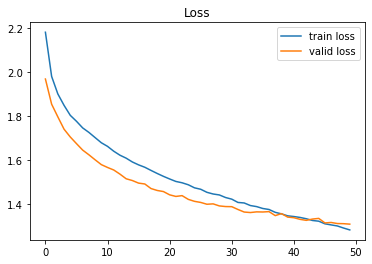

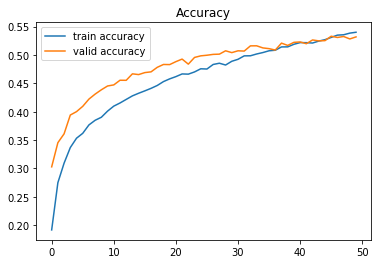

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [13]:
def build_mlp_new(input_shape, output_units=10, num_neurons=[2048,1024,512, 256, 128,32], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1,0.2,0.3,0.4,0.5]
OPTIMIZER = ['SGD','Adam']

In [15]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for drop_r in Dropout_EXP:
    for optimizer in OPTIMIZER:
        print("Experiment with Dropout_EXP = %.6f OPTIMIZER = %s" % (drop_r,str(optimizer)))
        keras.backend.clear_session() # 把舊的 Graph 清掉
        
        model = build_mlp_new(input_shape=x_train.shape[1:])
        model.summary()
        model.compile(optimizer = optimizer,loss="categorical_crossentropy", metrics=["accuracy"])

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-drop_r-%s-opt-%s" % (str(drop_r),str(optimizer))
        print(exp_name_tag)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}



Experiment with Dropout_EXP = 0.100000 OPTIMIZER = SGD
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2048)              6293504   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 1024)              2098176   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               524800    
_________________________________________________________________
drop

50000/50000 [==============================] - 17s 348us/step - loss: 1.4770 - acc: 0.4770 - val_loss: 1.4622 - val_acc: 0.4827
Epoch 44/50
50000/50000 [==============================] - 17s 344us/step - loss: 1.4696 - acc: 0.4775 - val_loss: 1.5682 - val_acc: 0.4579
Epoch 45/50
50000/50000 [==============================] - 17s 348us/step - loss: 1.4633 - acc: 0.4781 - val_loss: 1.5662 - val_acc: 0.4560
Epoch 46/50
50000/50000 [==============================] - 18s 352us/step - loss: 1.4549 - acc: 0.4818 - val_loss: 1.4470 - val_acc: 0.4886
Epoch 47/50
50000/50000 [==============================] - 17s 338us/step - loss: 1.4523 - acc: 0.4856 - val_loss: 1.4107 - val_acc: 0.4943
Epoch 48/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.4360 - acc: 0.4881 - val_loss: 1.4219 - val_acc: 0.4879
Epoch 49/50
50000/50000 [==============================] - 17s 332us/step - loss: 1.4367 - acc: 0.4911 - val_loss: 1.4944 - val_acc: 0.4755
Epoch 50/50
50000/50000 [=======

Epoch 35/50
50000/50000 [==============================] - 26s 510us/step - loss: 1.5395 - acc: 0.4520 - val_loss: 1.5011 - val_acc: 0.4683
Epoch 36/50
50000/50000 [==============================] - 26s 510us/step - loss: 1.5413 - acc: 0.4517 - val_loss: 1.5179 - val_acc: 0.4640
Epoch 37/50
50000/50000 [==============================] - 25s 510us/step - loss: 1.5275 - acc: 0.4586 - val_loss: 1.4839 - val_acc: 0.4727
Epoch 38/50
50000/50000 [==============================] - 25s 510us/step - loss: 1.5325 - acc: 0.4568 - val_loss: 1.4886 - val_acc: 0.4705
Epoch 39/50
50000/50000 [==============================] - 26s 515us/step - loss: 1.5292 - acc: 0.4535 - val_loss: 1.4766 - val_acc: 0.4741
Epoch 40/50
50000/50000 [==============================] - 26s 514us/step - loss: 1.5235 - acc: 0.4608 - val_loss: 1.4795 - val_acc: 0.4769
Epoch 41/50
50000/50000 [==============================] - 26s 513us/step - loss: 1.5157 - acc: 0.4638 - val_loss: 1.4926 - val_acc: 0.4749
Epoch 42/50
50000/50

Epoch 27/50
50000/50000 [==============================] - 17s 331us/step - loss: 1.6250 - acc: 0.4145 - val_loss: 1.5507 - val_acc: 0.4482
Epoch 28/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.6146 - acc: 0.4194 - val_loss: 1.5538 - val_acc: 0.4459
Epoch 29/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.6037 - acc: 0.4200 - val_loss: 1.5471 - val_acc: 0.4432
Epoch 30/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.5953 - acc: 0.4232 - val_loss: 1.5221 - val_acc: 0.4589
Epoch 31/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.5860 - acc: 0.4286 - val_loss: 1.5304 - val_acc: 0.4533
Epoch 32/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.5749 - acc: 0.4320 - val_loss: 1.5073 - val_acc: 0.4622
Epoch 33/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.5645 - acc: 0.4361 - val_loss: 1.4713 - val_acc: 0.4748
Epoch 34/50
50000/50

Epoch 19/50
50000/50000 [==============================] - 27s 545us/step - loss: 1.6146 - acc: 0.4251 - val_loss: 1.5390 - val_acc: 0.4536
Epoch 20/50
50000/50000 [==============================] - 28s 551us/step - loss: 1.6014 - acc: 0.4299 - val_loss: 1.5239 - val_acc: 0.4628
Epoch 21/50
50000/50000 [==============================] - 27s 543us/step - loss: 1.6014 - acc: 0.4308 - val_loss: 1.5265 - val_acc: 0.4556
Epoch 22/50
50000/50000 [==============================] - 27s 546us/step - loss: 1.5852 - acc: 0.4379 - val_loss: 1.5401 - val_acc: 0.4602
Epoch 23/50
50000/50000 [==============================] - 27s 540us/step - loss: 1.5899 - acc: 0.4350 - val_loss: 1.5490 - val_acc: 0.4566
Epoch 24/50
50000/50000 [==============================] - 27s 537us/step - loss: 1.5786 - acc: 0.4398 - val_loss: 1.5209 - val_acc: 0.4552
Epoch 25/50
50000/50000 [==============================] - 27s 534us/step - loss: 1.5707 - acc: 0.4421 - val_loss: 1.5140 - val_acc: 0.4623
Epoch 26/50
50000/50

Epoch 11/50
50000/50000 [==============================] - 17s 335us/step - loss: 1.8818 - acc: 0.3062 - val_loss: 1.8109 - val_acc: 0.3381
Epoch 12/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.8632 - acc: 0.3125 - val_loss: 1.7612 - val_acc: 0.3631
Epoch 13/50
50000/50000 [==============================] - 17s 336us/step - loss: 1.8478 - acc: 0.3177 - val_loss: 1.7327 - val_acc: 0.3743
Epoch 14/50
50000/50000 [==============================] - 17s 346us/step - loss: 1.8301 - acc: 0.3280 - val_loss: 1.7226 - val_acc: 0.3788
Epoch 15/50
50000/50000 [==============================] - 17s 344us/step - loss: 1.8128 - acc: 0.3343 - val_loss: 1.7328 - val_acc: 0.3730
Epoch 16/50
50000/50000 [==============================] - 17s 339us/step - loss: 1.7984 - acc: 0.3413 - val_loss: 1.6886 - val_acc: 0.3933
Epoch 17/50
50000/50000 [==============================] - 18s 351us/step - loss: 1.7808 - acc: 0.3474 - val_loss: 1.7478 - val_acc: 0.3728
Epoch 18/50
50000/50

Epoch 3/50
50000/50000 [==============================] - 26s 516us/step - loss: 1.9445 - acc: 0.2803 - val_loss: 1.8358 - val_acc: 0.3376
Epoch 4/50
50000/50000 [==============================] - 26s 512us/step - loss: 1.8805 - acc: 0.3137 - val_loss: 1.8048 - val_acc: 0.3429
Epoch 5/50
50000/50000 [==============================] - 26s 516us/step - loss: 1.8405 - acc: 0.3312 - val_loss: 1.7570 - val_acc: 0.3712
Epoch 6/50
50000/50000 [==============================] - 26s 515us/step - loss: 1.8116 - acc: 0.3479 - val_loss: 1.7199 - val_acc: 0.3703
Epoch 7/50
50000/50000 [==============================] - 26s 518us/step - loss: 1.7831 - acc: 0.3585 - val_loss: 1.6706 - val_acc: 0.4070
Epoch 8/50
50000/50000 [==============================] - 26s 516us/step - loss: 1.7523 - acc: 0.3700 - val_loss: 1.6678 - val_acc: 0.4013
Epoch 9/50
50000/50000 [==============================] - 26s 514us/step - loss: 1.7390 - acc: 0.3767 - val_loss: 1.6488 - val_acc: 0.4138
Epoch 10/50
50000/50000 [==

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 346us/step - loss: 2.2929 - acc: 0.1259 - val_loss: 2.2316 - val_acc: 0.1548
Epoch 2/50
50000/50000 [==============================] - 17s 341us/step - loss: 2.2235 - acc: 0.1679 - val_loss: 2.1291 - val_acc: 0.2176
Epoch 3/50
50000/50000 [==============================] - 18s 357us/step - loss: 2.1458 - acc: 0.2063 - val_loss: 2.0352 - val_acc: 0.2759
Epoch 4/50
50000/50000 [==============================] - 17s 334us/step - loss: 2.0864 - acc: 0.2282 - val_loss: 1.9674 - val_acc: 0.2873
Epoch 5/50
50000/50000 [==============================] - 17s 331us/step - loss: 2.0351 - acc: 0.2449 - val_loss: 1.9289 - val_acc: 0.3073
Epoch 6/50
50000/50000 [==============================] - 17s 333us/step - loss: 1.9974 - acc: 0.2565 - val_loss: 1.9180 - val_acc: 0.3145
Epoch 7/50
50000/50000 [==============================] - 17s 332us/step - loss: 1.9688 - acc: 0.2710 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 29s 572us/step - loss: 2.2139 - acc: 0.1428 - val_loss: 2.0568 - val_acc: 0.2051
Epoch 2/50
50000/50000 [==============================] - 27s 547us/step - loss: 2.0146 - acc: 0.2365 - val_loss: 1.8682 - val_acc: 0.3157
Epoch 3/50
50000/50000 [==============================] - 27s 549us/step - loss: 1.9052 - acc: 0.2997 - val_loss: 1.7825 - val_acc: 0.3540
Epoch 4/50
50000/50000 [==============================] - 27s 548us/step - loss: 1.8568 - acc: 0.3249 - val_loss: 1.7251 - val_acc: 0.3832
Epoch 5/50
50000/50000 [==============================] - 27s 545us/step - loss: 1.8078 - acc: 0.3445 - val_loss: 1.7110 - val_acc: 0.3862
Epoch 6/50
50000/50000 [==============================] - 27s 547us/step - loss: 1.7875 - acc: 0.3576 - val_loss: 1.6889 - val_acc: 0.3882
Epoch 7/50
50000/50000 [==============================] - 27s 550us/step - loss: 1.7530 - acc: 0.3679 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 368us/step - loss: 2.2936 - acc: 0.1187 - val_loss: 2.2344 - val_acc: 0.1771
Epoch 2/50
50000/50000 [==============================] - 18s 360us/step - loss: 2.2278 - acc: 0.1580 - val_loss: 2.1343 - val_acc: 0.2196
Epoch 3/50
50000/50000 [==============================] - 18s 360us/step - loss: 2.1618 - acc: 0.1874 - val_loss: 2.0605 - val_acc: 0.2385
Epoch 4/50
50000/50000 [==============================] - 18s 360us/step - loss: 2.1082 - acc: 0.2125 - val_loss: 2.0124 - val_acc: 0.2617
Epoch 5/50
50000/50000 [==============================] - 18s 360us/step - loss: 2.0720 - acc: 0.2299 - val_loss: 1.9879 - val_acc: 0.2793
Epoch 6/50
50000/50000 [==============================] - 18s 360us/step - loss: 2.0295 - acc: 0.2518 - val_loss: 1.9542 - val_acc: 0.3050
Epoch 7/50
50000/50000 [==============================] - 18s 359us/step - loss: 2.0022 - acc: 0.2624 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 29s 585us/step - loss: 2.1993 - acc: 0.1586 - val_loss: 1.9872 - val_acc: 0.2470
Epoch 2/50
50000/50000 [==============================] - 29s 575us/step - loss: 1.9718 - acc: 0.2614 - val_loss: 1.8561 - val_acc: 0.3216
Epoch 3/50
50000/50000 [==============================] - 27s 543us/step - loss: 1.8896 - acc: 0.3081 - val_loss: 1.8009 - val_acc: 0.3610
Epoch 4/50
50000/50000 [==============================] - 28s 551us/step - loss: 1.8443 - acc: 0.3277 - val_loss: 1.7297 - val_acc: 0.3681
Epoch 5/50
50000/50000 [==============================] - 27s 550us/step - loss: 1.8037 - acc: 0.3485 - val_loss: 1.7062 - val_acc: 0.3913
Epoch 6/50
50000/50000 [==============================] - 27s 546us/step - loss: 1.7745 - acc: 0.3578 - val_loss: 1.6779 - val_acc: 0.3908
Epoch 7/50
50000/50000 [==============================] - 27s 539us/step - loss: 1.7554 - acc: 0.3666 - val_loss: 1.

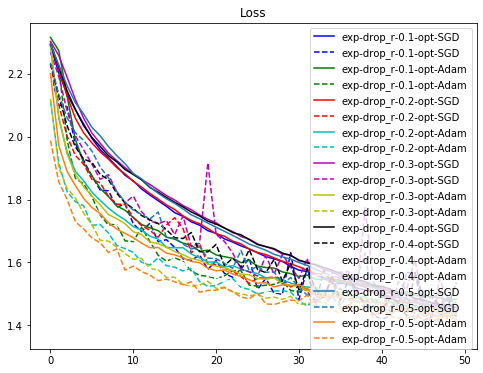

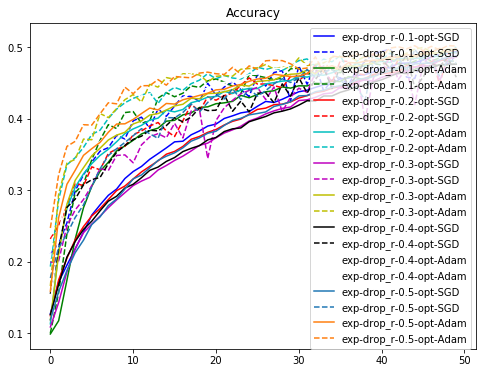

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()